In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)

%matplotlib inline
np.random.seed(42)

# Data Loading 

Basic conversions & price adjustments were taken from [Arther Paulino's Notebook](https://www.kaggle.com/arthurpaulino/honey-production). 

In [6]:
data = pd.read_csv("honeyproduction.csv").rename(columns={
    'state':'state_code',
    'numcol':'n_colony',
    'yieldpercol':'production_per_colony',
    'totalprod':'total_production',
    'stocks':'stock_held',
    'priceperlb':'price_per_lb',
    'prodvalue':'total_production_value'
})

state_code_to_name = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}
data['consumption'] = data['total_production'] - data['stock_held']
data['state'] = data['state_code'].apply(lambda x: state_code_to_name[x])
inflation_rate = {
    1998: 1.454,
    1999: 1.423,
    2000: 1.376,
    2001: 1.339,
    2002: 1.317,
    2003: 1.288,
    2004: 1.255,
    2005: 1.214,
    2006: 1.176,
    2007: 1.143,
    2008: 1.101,
    2009: 1.105,
    2010: 1.087,
    2011: 1.054,
    2012: 1.032
}

monetized_features = ['price_per_lb', 'total_production_value']

for year in set(data['year']):
    for feature in monetized_features:
        data.loc[data['year']==year, feature] = inflation_rate[year]*data.loc[data['year']==year, feature]
data.sample(5)

,state_code,n_colony,production_per_colony,total_production,stock_held,price_per_lb,total_production_value,year,consumption,state
8,ID,120000.0,50,6000000.0,2220000.0,0.94510,5670600.0,1998,3780000.0,Idaho
442,MN,122000.0,78,9516000.0,2569000.0,1.53039,14562927.0,2008,6947000.0,Minnesota
484,MS,14000.0,104,1456000.0,87000.0,1.45860,2123810.0,2009,1369000.0,Mississippi
333,SD,220000.0,79,17380000.0,11818000.0,1.00762,17511950.0,2005,5562000.0,South Dakota
327,NY,59000.0,73,4307000.0,2283000.0,1.62676,7005994.0,2005,2024000.0,New York


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 10 columns):
state_code                626 non-null object
n_colony                  626 non-null float64
production_per_colony     626 non-null int64
total_production          626 non-null float64
stock_held                626 non-null float64
price_per_lb              626 non-null float64
total_production_value    626 non-null float64
year                      626 non-null int64
consumption               626 non-null float64
state                     626 non-null object
dtypes: float64(6), int64(2), object(2)
memory usage: 49.0+ KB


# Top 10 states in terms of number of honey producing colonies

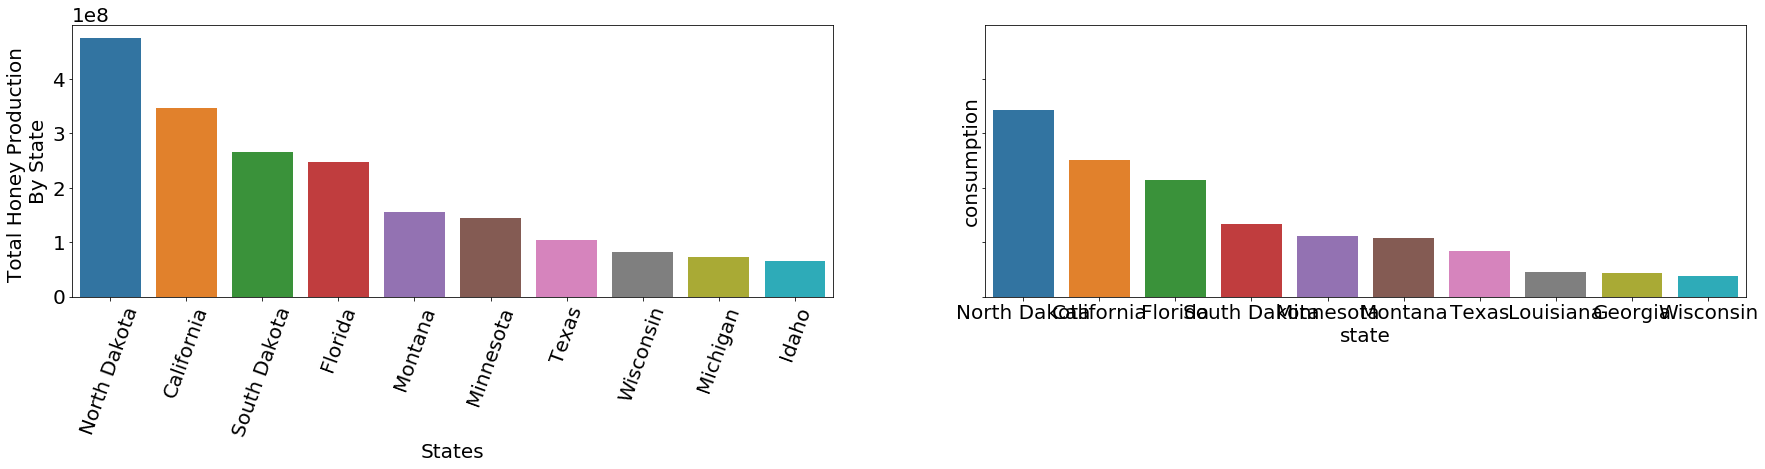

In [34]:
top10_states_by_production = data[['state','total_production']].groupby('state').sum().sort_values(by='total_production', ascending=False).head(10).reset_index()
top10_states_by_consumption = data[['state','consumption']].groupby('state').sum().sort_values(by='consumption', ascending=False).head(10).reset_index()

f, (ax1, ax2) = plt.subplots(1,2, figsize = (30,5), sharey=True)

sns.barplot(data=top10_states_by_production, x='state', y='total_production', ax=ax1)
sns.barplot(data=top10_states_by_consumption, x='state', y='consumption', ax=ax2)
ax2.se
ax1.set(xlabel='States', ylabel='Total Honey Production \nBy State')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
#plt.figure(figsize=(25,5))
#plt.ylabel("Number of \nHoney-Producing Colonies")
#plt.xlabel("State")
plt.show()

In [4]:
data[['year','totalprod']]

,year,totalprod
0,1998,1136000.0
1,1998,3300000.0
2,1998,3445000.0
3,1998,37350000.0
4,1998,1944000.0
5,1998,22540000.0
6,1998,4200000.0
7,1998,944000.0
8,1998,6000000.0
9,1998,639000.0
